In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2018-01-01'
end = '2024-07-12'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,53.189472,24752000
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,54.062481,28604000
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,54.258255,20092000
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,55.048855,25582000
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,55.284088,20952000
...,...,...,...,...,...,...,...
1636,2024-07-05,187.320007,192.259995,187.320007,191.960007,191.960007,14303400
1637,2024-07-08,191.365005,191.679001,189.320007,190.479996,190.479996,12097600
1638,2024-07-09,191.750000,192.860001,190.229996,190.440002,190.440002,10198500
1639,2024-07-10,190.750000,193.309998,190.619995,192.660004,192.660004,12052900


In [5]:
ma_100_days = data.Close.rolling(100).mean()

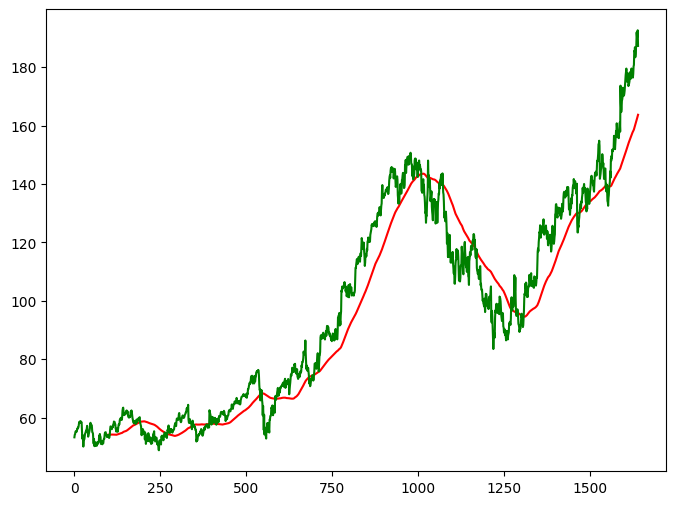

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

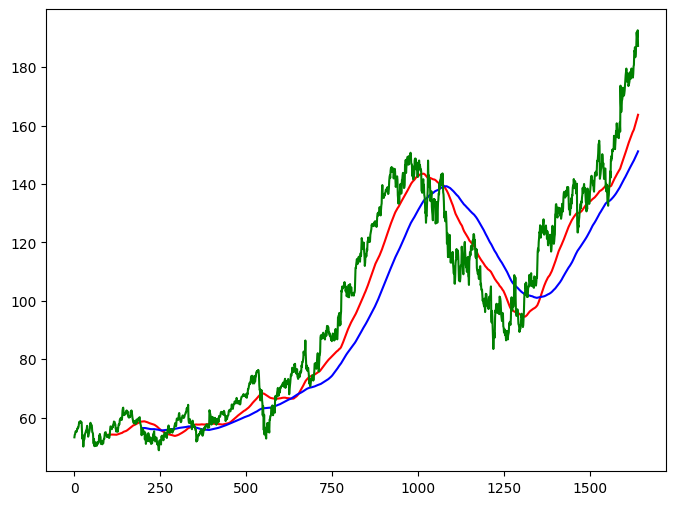

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

1312

In [12]:
data_test.shape[0]

329

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\Siddesh G M\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - loss: 0.1407
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - loss: 0.0131
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0101
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0108
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0097
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0089
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0080
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0088
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - loss: 0.0077
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0081
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0080
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0065
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0068
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0075
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - l

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

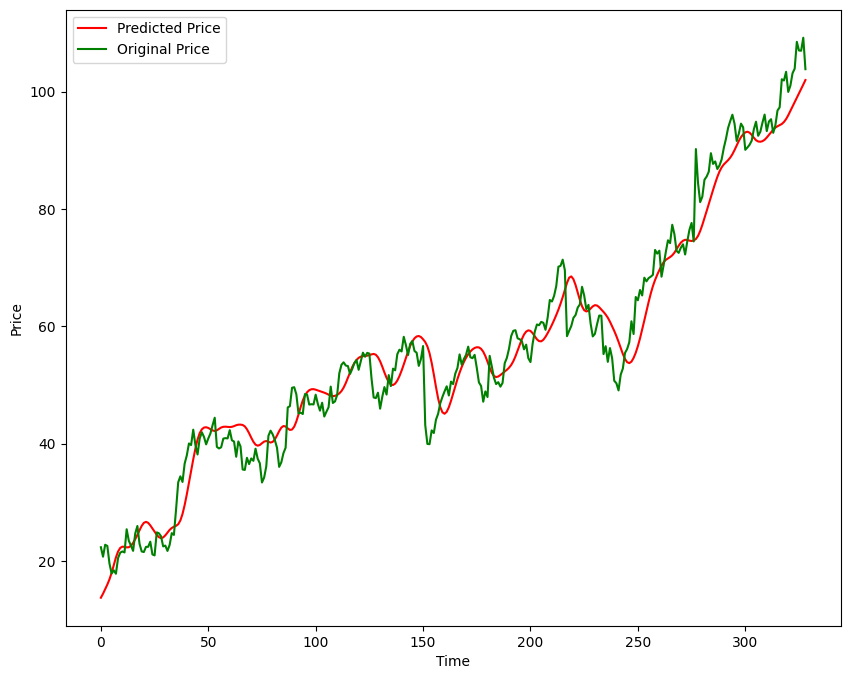

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')